In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC

In [7]:
data=pd.read_csv("E:\Jupyter_notebooks\data\secom.txt",sep = " ",header= None)

In [8]:
data.columns


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            580, 581, 582, 583, 584, 585, 586, 587, 588, 589],
           dtype='int64', length=590)

In [9]:
data.isnull().sum()

0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 590, dtype: int64

In [10]:
#以平均值填补空值
data = np.array(data)
for i in range(data.shape[1]):
       temp = np.array(data)[:, i].tolist()
       mean = np.nanmean(temp)
       data[np.argwhere(np.isnan(data[:, i].T)), i] = mean
data=pd.DataFrame(data)

In [11]:
#降维 方法1：使用sklearn中pca算法
from sklearn.decomposition import PCA
pca_line=PCA().fit(data)
X_dr=pca_line.transform(data)
X_dr.shape

(1567, 590)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


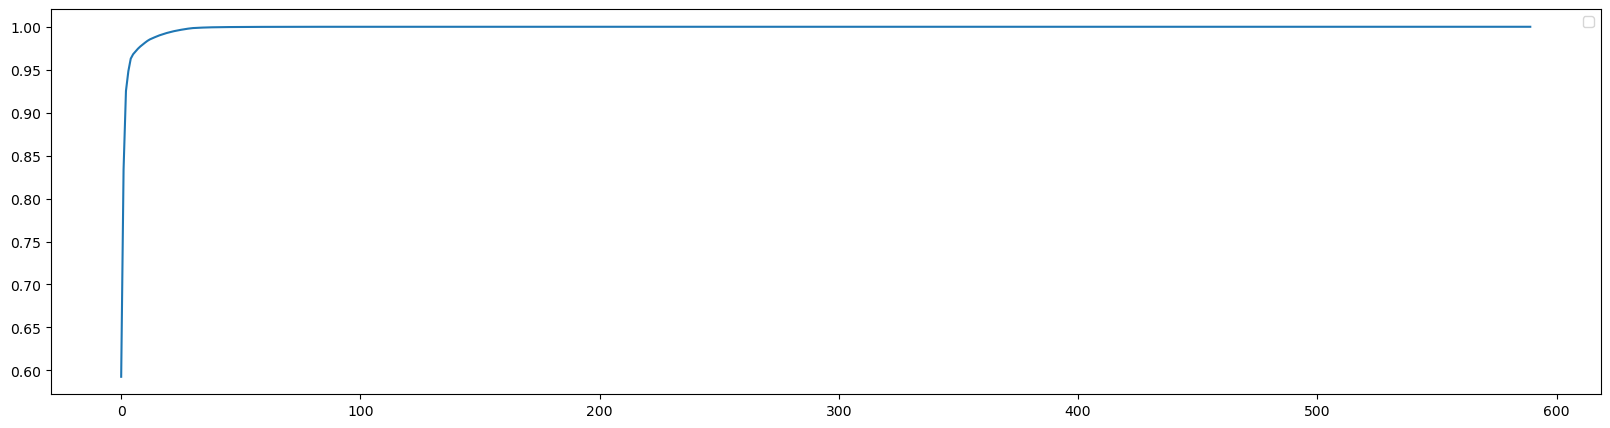

In [12]:

pca_line.explained_variance_ratio_
#画累计方差贡献率曲线，找最佳降维后维度的范围
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.legend()
plt.show()

In [13]:
pca_line=PCA(25).fit_transform(data)